# Regresja

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')

In [2]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']
y = np.round(y, decimals=-2) #przy cenach posiadłości część nie ma aż tak dużo znaczenia znaczenia. Zakładając że ostatnie 2 miejsca wynoszą 99 to nawet dla minimalnej wartości w zbiorze danych stonowi to jedynie 0.2%

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
trained_models = []

## Modele

### Linear Model - model podstawowy

In [4]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Współczynniki: ',reg.coef_)
print('Wyraz wolny', reg.intercept_)

y_pred = reg.predict(X_test)

cv_score = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 20)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Linear Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


Współczynniki:  [-2.62662877e+01  4.24832270e+01  1.06273403e+06  4.69907062e+05
 -6.05029923e+04 -3.92187123e+05  2.54220006e+03 -2.47245496e+06
 -1.27279017e+04  9.00825894e+06  8.25126416e+06]
Wyraz wolny -556945.7230048082


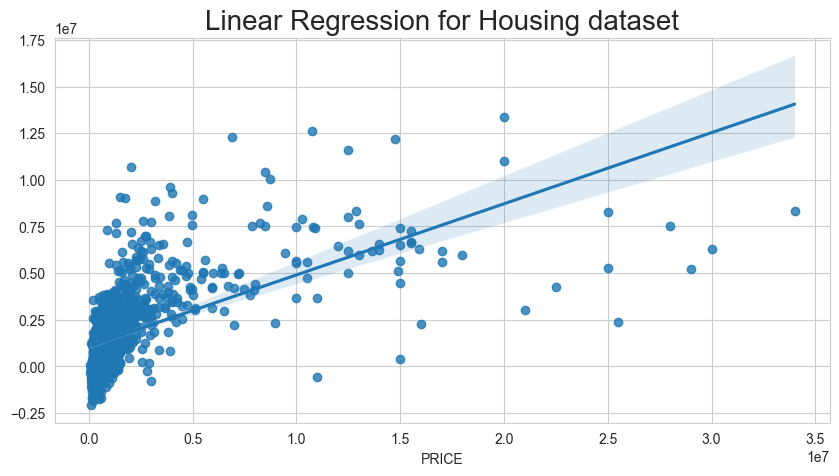

In [6]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear Regression for Housing dataset', fontsize = 20)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = HuberRegressor().fit(X_train, y_train)

print('Współczynniki: ',reg.coef_)
print('Wyraz wolny', reg.intercept_)

y_pred = reg.predict(X_test)

cv_score = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 20)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Huber Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 2607779.1857
R2: 0.3508
Cross Validated R2:  [0.3459, 0.1563, 0.5221, 0.4182, 0.3481, 0.2682, 0.0582, 0.1891, 0.5465, 0.2921, 0.1511, 0.4439, 0.0411, 0.2398, 0.4886, 0.5675, 0.4712, 0.5468, -0.0858, 0.2289]
Mean Cross Validated R2:  0.3119
Min Cross Validated R2:  -0.0858
Max Cross Validated R2:  0.5675


In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Huber Regression for Housing dataset', fontsize = 20)
plt.show()

### Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

cv_score = cross_val_score(estimator = forest_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = forest_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Forest Regressor Model = 10 trees', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 1942255.0897
R2: 0.6399
Cross Validated R2:  [0.7305, 0.1132, 0.749, 0.5066, 0.5988, 0.3818, 0.1878, 0.2456, 0.8577, 0.455, 0.0356, 0.2617, 0.1113, 0.3715, 0.6031, 0.751, 0.8531, 0.6215, -0.1155, 0.3451]
Mean Cross Validated R2:  0.4332
Min Cross Validated R2:  -0.1155
Max Cross Validated R2:  0.8577


In [8]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_30 = RandomForestRegressor(n_estimators = 30, random_state = 0)
forest_reg_30.fit(X_train, y_train)
y_pred = forest_reg_30.predict(X_test)

cv_score = cross_val_score(estimator = forest_reg_30, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = forest_reg_30.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Forest Regressor Model = 30 trees', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 1845208.6931
R2: 0.6749
Cross Validated R2:  [0.7472, 0.1601, 0.8087, 0.4738, 0.5582, 0.4143, 0.5014, 0.4089, 0.8784, 0.4356, 0.3033, 0.2855, 0.1168, 0.4432, 0.7319, 0.7524, 0.8228, 0.601, 0.4607, 0.4286]
Mean Cross Validated R2:  0.5166
Min Cross Validated R2:  0.1168
Max Cross Validated R2:  0.8784


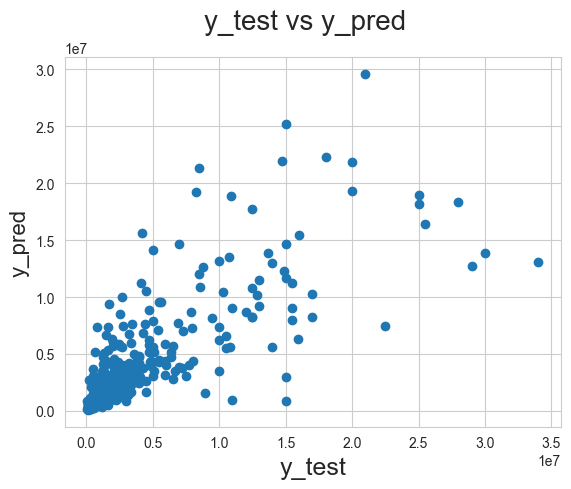

In [9]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

cv_score = cross_val_score(estimator = tree_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = tree_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Decision Tree', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 3429325.9525
R2: -0.1227
Cross Validated R2:  [0.784, -0.0868, -0.3017, 0.4195, -0.787, -0.5042, -0.0685, 0.1576, 0.7495, -0.0064, 0.1678, 0.6541, -0.3323, 0.3555, 0.3799, -0.3171, 0.7402, 0.1361, -0.7727, 0.1631]
Mean Cross Validated R2:  0.0765
Min Cross Validated R2:  -0.787
Max Cross Validated R2:  0.784


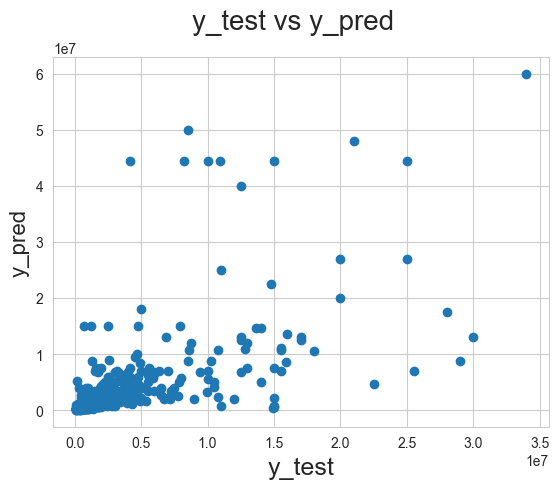

In [11]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

### Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

cv_score = cross_val_score(estimator = ridge_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = ridge_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Ridge Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 2604635.1124
R2: 0.3523
Cross Validated R2:  [0.3423, 0.1846, 0.5225, 0.4142, 0.3424, 0.2672, 0.0838, 0.1974, 0.5331, 0.2871, 0.1577, 0.456, 0.0784, 0.2423, 0.4833, 0.5581, 0.457, 0.5479, -0.0001, 0.229]
Mean Cross Validated R2:  0.3192
Min Cross Validated R2:  -0.0001
Max Cross Validated R2:  0.5581


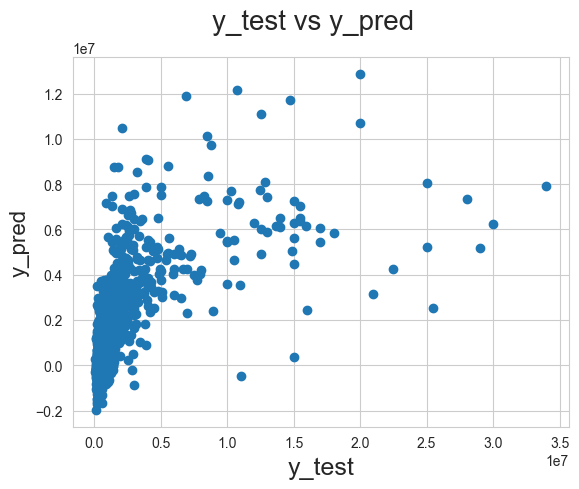

In [13]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)      
plt.show()

### XGBoost

In [14]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)
XGBR.fit(X_train, y_train)
y_pred = XGBR.predict(X_test)

cv_score = cross_val_score(estimator = XGBR, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = XGBR.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['XGBRegressor', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

RMSE: 1880565.5807
R2: 0.6624
Cross Validated R2:  [0.785, 0.1091, 0.6314, 0.7371, 0.702, 0.4071, 0.4079, 0.4468, 0.9107, 0.6044, 0.583, -0.0333, 0.4252, 0.6009, 0.6437, 0.7793, 0.8412, 0.6913, 0.5896, 0.4815]
Mean Cross Validated R2:  0.5672
Min Cross Validated R2:  -0.0333
Max Cross Validated R2:  0.9107


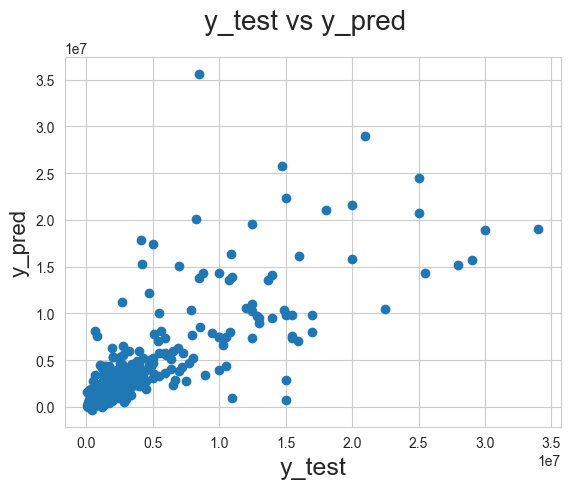

In [15]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

cv_score = cross_val_score(estimator = log_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = log_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Logistic Regression', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

RMSE: 3299859.8479
R2: 0.0044
Cross Validated R2:  [0.0063, 0.019, 0.0127, 0.0, 0.0, 0.019, 0.0063, 0.0, 0.0, 0.0, 0.0063, 0.0, 0.0, 0.0, 0.0127, 0.0, 0.0127, 0.0064, 0.0064, 0.0127]
Mean Cross Validated R2:  0.006
Min Cross Validated R2:  0.0
Max Cross Validated R2:  0.019


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


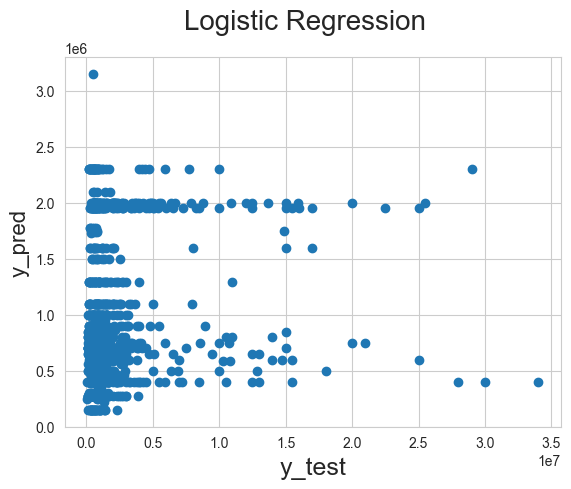

In [17]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Logistic Regression', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### SVC

In [18]:
from sklearn.svm import SVC
svc_clf = SVC(probability=True)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

cv_score = cross_val_score(estimator = svc_clf, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = svc_clf.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['SVC', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


RMSE: 3390064.0543
R2: 0.0118
Cross Validated R2:  [0.0063, 0.0063, 0.0, 0.0, 0.0127, 0.0063, 0.0, 0.0063, 0.0063, 0.0, 0.0, 0.0063, 0.0127, 0.0063, 0.0064, 0.0064, 0.0064, 0.0127, 0.0127, 0.0]
Mean Cross Validated R2:  0.0057
Min Cross Validated R2:  0.0
Max Cross Validated R2:  0.0127


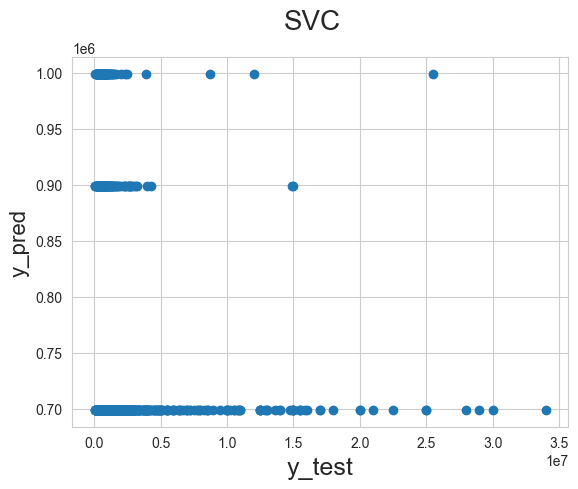

In [19]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('SVC', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [20]:
from sklearn.linear_model import BayesianRidge
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

cv_score = cross_val_score(estimator = bayesian_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = bayesian_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Bayesian Reg', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

RMSE: 3390064.0543
R2: 0.3512
Cross Validated R2:  [0.3452, 0.1624, 0.5224, 0.4175, 0.347, 0.2681, 0.0643, 0.1911, 0.5436, 0.2911, 0.1525, 0.4468, 0.049, 0.2404, 0.4876, 0.5656, 0.468, 0.5475, -0.067, 0.229]
Mean Cross Validated R2:  0.3136
Min Cross Validated R2:  -0.067
Max Cross Validated R2:  0.5656


### Bayesian regression

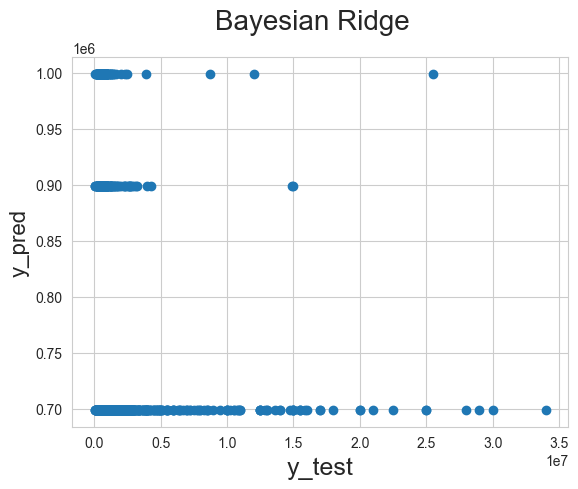

In [21]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Bayesian Ridge', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## Podsumowanie Regresji

In [22]:
trained_models = pd.DataFrame( trained_models, columns=['Model','RMSE','R2 Score','Mean Cross Validated R2 Score','Min Cross Validated R2 Score','Max Cross Validated R2 Score','Cross Validated R2 Scores'])
trained_models

,Model,RMSE,R2 Score,Mean Cross Validated R2 Score,Min Cross Validated R2 Score,Max Cross Validated R2 Score,Cross Validated R2 Scores
0,Linear Model,2607779.19,0.3508,0.3119,-0.0858,0.5675,"[0.3459, 0.1563, 0.5221, 0.4182, 0.3481, 0.268..."
1,Forest Regressor Model = 10 trees,1942255.09,0.6399,0.4332,-0.1155,0.8577,"[0.7305, 0.1132, 0.749, 0.5066, 0.5988, 0.3818..."
2,Forest Regressor Model = 30 trees,1845208.69,0.6749,0.5166,0.1168,0.8784,"[0.7472, 0.1601, 0.8087, 0.4738, 0.5582, 0.414..."
3,Decision Tree,3429325.95,-0.1227,0.0765,-0.7870,0.7840,"[0.784, -0.0868, -0.3017, 0.4195, -0.787, -0.5..."
4,Ridge Model,2604635.11,0.3523,0.3192,-0.0001,0.5581,"[0.3423, 0.1846, 0.5225, 0.4142, 0.3424, 0.267..."
5,XGBRegressor,1880565.58,0.6624,0.5672,-0.0333,0.9107,"[0.785, 0.1091, 0.6314, 0.7371, 0.702, 0.4071,..."
6,Logistic Regression,3299859.85,0.0044,0.0060,0.0000,0.0190,"[0.0063, 0.019, 0.0127, 0.0, 0.0, 0.019, 0.006..."
7,SVC,3390064.05,0.0118,0.0057,0.0000,0.0127,"[0.0063, 0.0063, 0.0, 0.0, 0.0127, 0.0063, 0.0..."
8,Bayesian Reg,3390064.05,0.3512,0.3136,-0.0670,0.5656,"[0.3452, 0.1624, 0.5224, 0.4175, 0.347, 0.2681..."


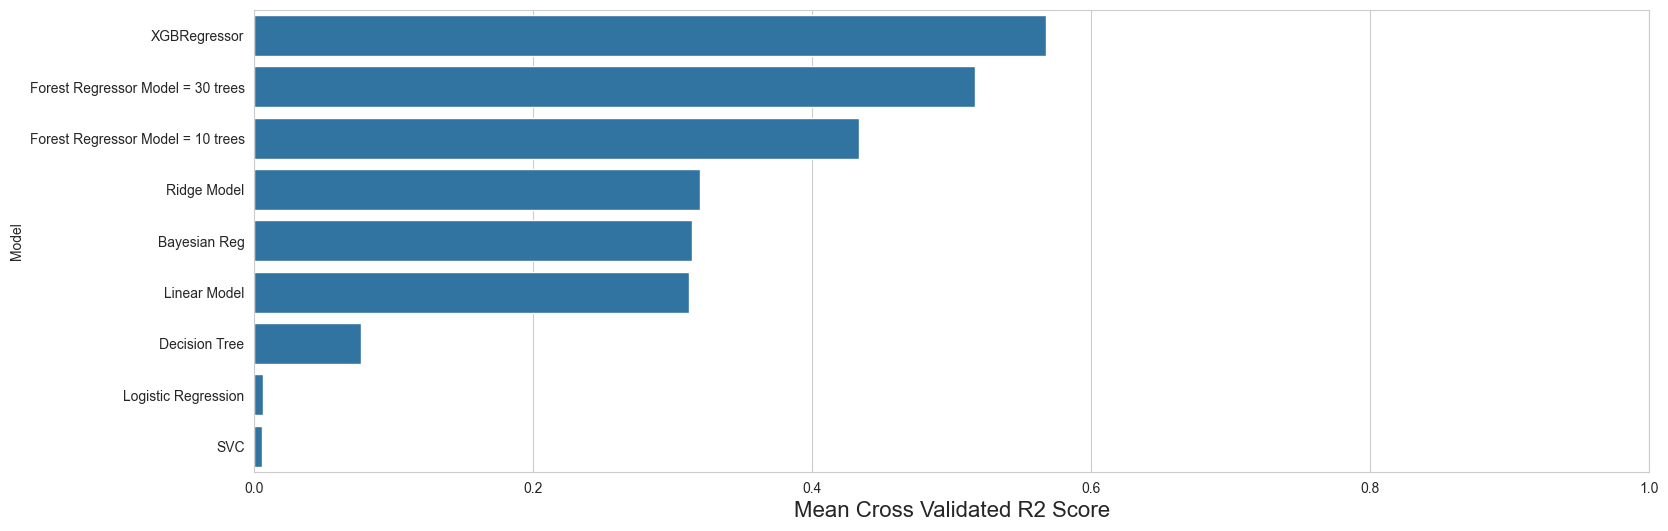

In [23]:
f, axe = plt.subplots(1,1, figsize=(18,6))

trained_models.sort_values(by=['Mean Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Mean Cross Validated R2 Score', y='Model', data = trained_models, ax = axe)
axe.set_xlabel('Mean Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

plt.show()

# Klasyfikacja cen

Dzielimy zbiór danych na 5 przedziałów, aby móc przewidzieć etykiety zamiast wartości ciągłych.

In [24]:
import pandas as pd
X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']
y = np.round(y, decimals=-2) #przy cenach posiadłości część nie ma aż tak dużo znaczenia znaczenia. Zakładając że ostatnie 2 miejsca wynoszą 99 to nawet dla minimalnej wartości w zbiorze danych stonowi to jedynie 0.2%

sorted_prices = y.sort_values()

categories = pd.qcut(sorted_prices, q=3, labels=[ 'Low',  'Medium', 'High'])

category_ranges = {}
for category in categories.cat.categories:
    min_val = sorted_prices[categories == category].min()
    max_val = sorted_prices[categories == category].max()
    category_ranges[category] = (min_val, max_val)

print("Wartości dla każdego przedziału:")
for category, (min_val, max_val) in category_ranges.items():
    print(f"{category}: {min_val} - {max_val}")

Wartości dla każdego przedziału:
Low: 49500 - 599000
Medium: 599900 - 1175000
High: 1180000 - 60000000


In [25]:
y =  y.apply(lambda x: 0 if x < 599000 else (1 if x < 1100000 else (2 if x < 2500000 else 3)))

print(y.value_counts())

PRICE
0    1477
1    1440
2     998
3     591
Name: count, dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
trained_models = []

## Modele Klasyfikacji

### DecisionTreeClassifier

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini',  random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_gini)
class_report = classification_report(y_test, y_pred_gini)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[324  96  14   2]
 [ 80 261  89  14]
 [ 18  82 160  34]
 [  2   8  38 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       436
           1       0.58      0.59      0.59       444
           2       0.53      0.54      0.54       294
           3       0.72      0.73      0.73       178

    accuracy                           0.65      1352
   macro avg       0.65      0.65      0.65      1352
weighted avg       0.65      0.65      0.65      1352


### Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Instantiate the Random Forest Classifier
clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train, y_train)
y_pred_forest = clf_forest.predict(X_test)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
class_report_forest = classification_report(y_test, y_pred_forest)

print("Confusion Matrix (Random Forest Classifier):")
print(conf_matrix_forest)
print("\nClassification Report (Random Forest Classifier):")
print(class_report_forest)


Confusion Matrix (Random Forest Classifier):
[[348  83   5   0]
 [ 62 321  58   3]
 [ 11  76 176  31]
 [  2   2  38 136]]

Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       436
           1       0.67      0.72      0.69       444
           2       0.64      0.60      0.62       294
           3       0.80      0.76      0.78       178

    accuracy                           0.73      1352
   macro avg       0.73      0.72      0.73      1352
weighted avg       0.73      0.73      0.73      1352


## Podsumowanie Klasyfikacji

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_gini)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_forest)
auc_tree = roc_auc_score(y_test, y_pred_gini)
auc_forest = roc_auc_score(y_test, y_pred_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_forest:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

ValueError: multiclass format is not supported